# TP2 Ossan KASSEGNE K-Mean

## Exercice 1

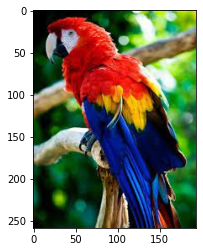

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## read image
img = plt.imread('arra.jpeg')
img = img/255
## show image
imgplot = plt.imshow(img)

## Exercice 2

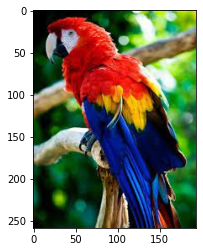

In [2]:
import copy
# make a deep copy of image
#img = img.astype('float64')
img2 = copy.deepcopy(img)
img2plot = plt.imshow(img2)

## Exercice 3

In [3]:
## objectifs, réduire le nombnre de couleurs d'un image à k couleurs
## Tous les points appartenant à un cluster seront remplacé par la couleur du centre de gravité de la classe
def copyReshape(img):
    img2 = copy.deepcopy(img)
    L,l,P = img2.shape
    img2d = img2.reshape(L*l,P)
    return (img2,img2d)
    
L,l,P = img2.shape
img2d = img2.reshape(L*l,P)

#Visualiser le  pixel 10,10
print('Pixel 10,10')
print(img2d[10*l+10])
print(img2[10,10])

#Modification du pixel O,O
print('Pixel 0,0')
print(img2d[0*l+0])
print(img2[0,0])

img2[0,0] = [0,0,0.4] 

print('Pixel 0,0 modifier')
print(img2d[0*l+0])
print(img2[0,0])

Pixel 10,10
[0. 0. 0.]
[0. 0. 0.]
Pixel 0,0
[0.00392157 0.00392157 0.00392157]
[0.00392157 0.00392157 0.00392157]
Pixel 0,0 modifier
[0.  0.  0.4]
[0.  0.  0.4]


## Exercice 4

In [4]:
from scipy.cluster.vq import kmeans2
# with 4 cluster
centroid, label = kmeans2(img2d, 4)
print(centroid)
label

[[0.24253973 0.49012148 0.27054244]
 [0.7602123  0.22312249 0.08837684]
 [0.04242121 0.12348171 0.13205095]
 [0.73773337 0.78439237 0.62619322]]


array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

## Exercice 5

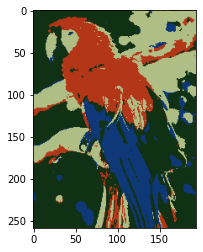

In [5]:
# replace with centroid
def replacer(data2D,nbCLusters):
    centroid, label = kmeans2(data2D, nbCLusters)
    for i in range(0, len(label)):
        centroidID = label[i]
        data2D[i] = centroid[centroidID]

# Pour 10 classes
replacer(img2d,4)
plt.imshow(img2)

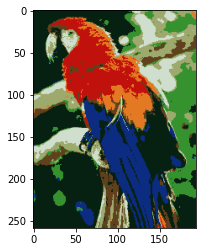

In [6]:
# Pour 8 classes 
img8, img8d = copyReshape(img)
replacer(img8d,8)
plt.imshow(img8)

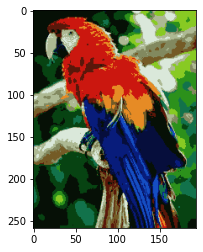

In [10]:
# Pour 16 classes 
img16, img16d = copyReshape(img)
replacer(img16d,16)
plt.imshow(img16)

## Exercice 6

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy.spatial import distance_matrix

## read image
img = plt.imread('arra.jpeg')
img = img/255

def copyReshape(img):
    img2 = copy.deepcopy(img)
    L,l,P = img2.shape
    img2d = img2.reshape(L*l,P)
    return (img2,img2d)

## Implementation de k-mean
img1, img1d = copyReshape(img)

def kmean(X,k):
   
    # 1- Select k number of clusters
    
    # 2- Select random K points which will act as centroids.
    randomlist = random.sample(range(0, len(X)), k)
    print('random centroid id :',randomlist)
    for i in range(0,k):
        line = np.array(X[randomlist[i]])
        if(i == 0):
            centroid = line
        else:
            centroid = np.vstack([centroid, line])
    print("\nliste des k centroides: \n",centroid)
    iter = 0
    while(True):
        iter = iter + 1
        print('\n===== itération ======= \n',iter)
        # Save the centroid array for next step
        centroidPrec = np.copy(centroid)
        # 3- Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.
        # distance of points from centroids
        dist = distance_matrix(X,centroid)

        # change 0 to nan
        dist[np.isnan(dist)] = 0
        for i in range(0, len(X)):

            # find shortest distance to centroid
            label2Value = np.amin(dist[i])
            label2ID = np.where(dist[i] == label2Value)
            if(i == 0):
                label2 = np.array(label2ID)
            else:
                label2 = np.append(label2,label2ID)

        print('labels et nombre de labels : ')
        print(label2,len(label2))

        #4- Placer un nouveau centroid dans chaque cluster
        # Trouver les clusters
        # Choisir un nouveau centroid dans ce cluster
        for i in range(0,k):
            cluster = X[label2 == i]
            centroid[i] = np.mean(cluster,axis=0)
        print('Les nouveaux centroides : \n', centroid)
        if(np.array_equal(centroid, centroidPrec)):
            break
    return (centroid,label2)
    


random centroid id : [8185, 29897, 32711, 26140, 18834, 43293, 49239, 24884, 1349, 48851]

liste des k centroides: 
 [[0.54901961 0.54117647 0.63529412]
 [0.65882353 0.78431373 0.77254902]
 [0.         0.06666667 0.42352941]
 [0.00784314 0.01176471 0.        ]
 [0.80392157 0.82352941 0.80784314]
 [0.54901961 0.8        0.        ]
 [0.71372549 0.31372549 0.1254902 ]
 [0.         0.40784314 0.23529412]
 [0.48235294 0.70980392 0.00392157]
 [0.37647059 0.05098039 0.        ]]

===== itération ======= 
 1
labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246
Les nouveaux centroides : 
 [[0.53847245 0.58217401 0.50292318]
 [0.67384454 0.78877698 0.65254572]
 [0.03453528 0.11649613 0.45173323]
 [0.02294789 0.09334289 0.0433104 ]
 [0.8679615  0.9015198  0.81966281]
 [0.74250347 0.80734056 0.13507873]
 [0.75532045 0.26130969 0.13057662]
 [0.07183888 0.40016005 0.1748857 ]
 [0.364652   0.66424792 0.11912486]
 [0.42781766 0.10540782 0.0451648 ]]

===== itération ======= 
 2
labels et nombre de l

labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246
Les nouveaux centroides : 
 [[0.52754273 0.4698949  0.31430455]
 [0.67016691 0.73364261 0.56666713]
 [0.04530956 0.15598851 0.52417649]
 [0.0255608  0.09654609 0.0624348 ]
 [0.8580839  0.91490352 0.86088401]
 [0.8942327  0.57705575 0.13243873]
 [0.79887113 0.09837826 0.06396887]
 [0.0639015  0.40621557 0.16785248]
 [0.37938656 0.71436728 0.15648394]
 [0.3826785  0.17597107 0.06692885]]

===== itération ======= 
 19
labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246
Les nouveaux centroides : 
 [[0.52662336 0.46839005 0.31150972]
 [0.66914583 0.73257009 0.56517806]
 [0.0452748  0.15598051 0.52424036]
 [0.02545206 0.09676795 0.06246731]
 [0.85734398 0.91402477 0.86021315]
 [0.89554547 0.57493202 0.13357262]
 [0.79839105 0.09785372 0.06367413]
 [0.06429904 0.40711198 0.16839142]
 [0.3808437  0.71513758 0.15578041]
 [0.38144691 0.17442482 0.06634674]]

===== itération ======= 
 20
labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246


labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246
Les nouveaux centroides : 
 [[0.51570209 0.45220868 0.28588726]
 [0.66238957 0.72204833 0.55439904]
 [0.0455227  0.15615797 0.52428849]
 [0.02414558 0.09799805 0.06270524]
 [0.85342444 0.90996884 0.85499659]
 [0.89934905 0.56939036 0.1360065 ]
 [0.79770139 0.09710038 0.06331763]
 [0.06585061 0.41105486 0.16998367]
 [0.38765355 0.71950809 0.15447018]
 [0.36915419 0.15461884 0.06000079]]

===== itération ======= 
 37
labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246
Les nouveaux centroides : 
 [[0.51542207 0.45191166 0.2855616 ]
 [0.66216079 0.72180057 0.55410623]
 [0.0455227  0.15615797 0.52428849]
 [0.02414558 0.09799805 0.06270524]
 [0.85335116 0.90991064 0.85489386]
 [0.89934905 0.56939036 0.1360065 ]
 [0.79770139 0.09710038 0.06331763]
 [0.06585061 0.41105486 0.16998367]
 [0.38769641 0.71949825 0.15423115]
 [0.36910463 0.1544373  0.05991234]]

===== itération ======= 
 38
labels et nombre de labels : 
[3 3 3 ... 3 3 3] 50246


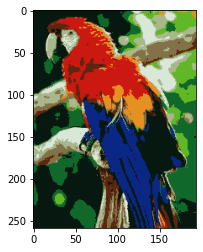

In [9]:
## test
centroid, label = kmean(img1d,10)
# Remplacer les couleurs par le centroid
for i in range(0, len(label)):
        centroidID = label[i]
        img1d[i] = centroid[centroidID]
plt.imshow(img1)